In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Récupération des données
df=pd.read_csv('eolien-en-france-final.csv')

In [11]:
#Supprime les données nom utile, non exploitables
df= df[df["Unnamed: 2"].notna()]
df=df.drop(df[df['12/31/2015'].str.match('^-')].index)
#Formatage du type des donner en entier pour exploiter les valeurs
df["9/30/2021"]=df["9/30/2021"].astype(int)

In [12]:
#Triage des données par ordre décroisant
df=df.sort_values(by=["9/30/2021"], ascending=False)

In [13]:
#On récupere les 20 premières donnée ainsi que le nom des départements
x=df['9/30/2021'].head(20)
y=df['Unnamed: 1'].head(20)

In [14]:
#Rajout de données, les autres départements
x.loc[20]=df["9/30/2021"].sum()-x.sum()
y.loc[20]="63 autres département"

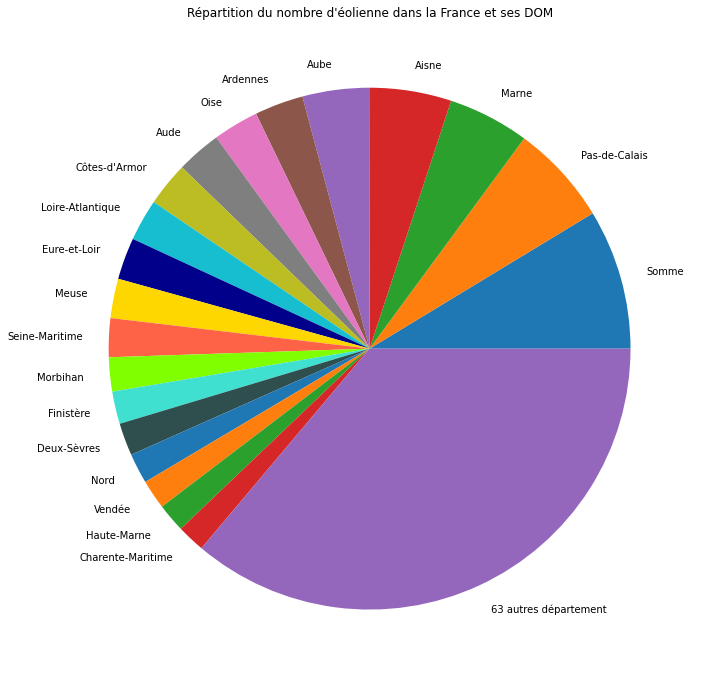

In [15]:
#Diagramme des répartition des eoliennes par départements
plt.figure(figsize=(12,12))
plt.pie(x,labels=y, colors=["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan","darkblue", "gold", "tomato", "chartreuse", "turquoise","darkslategray"])
plt.title("Répartition du nombre d'éolienne dans la France et ses DOM")
plt.show()

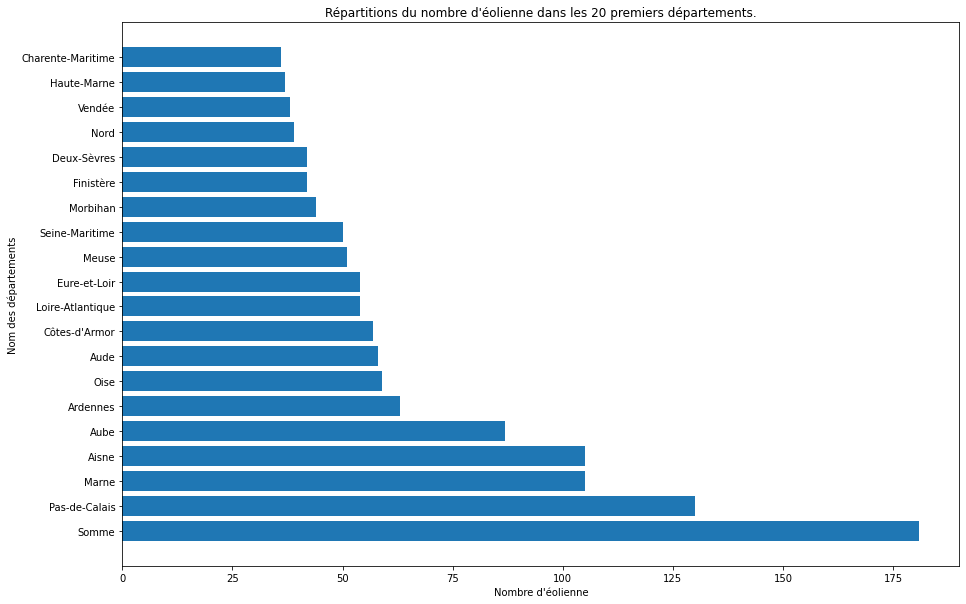

In [16]:
#Diagramme en barre du nombre d'éolienne des 20 premiers départements
plt.figure(figsize=(15,10))
plt.barh(y[:20],x[:20])
plt.xlabel("Nombre d'éolienne")
plt.ylabel("Nom des départements")
plt.title("Répartitions du nombre d'éolienne dans les 20 premiers départements.")
plt.show()